異常檢測實戰task:
1. 基於anomaly_data.csv數據，可視化數據分佈情況，及其對應高斯分佈的概率密度
2. 建立模型，實現異常數據點預測
3. 可視化異常檢測處理結果
4. 修改概率分佈閾值EllipticEnvelope(contamination=0.1)中的contamination，查看閾值改變對結果的影響

In [2]:
#load the data
import pandas as pd
import numpy as np
data = pd.read_csv('anomaly_data.csv')
data.head()

,x1,x2
0,8.046815,9.741152
1,8.408520,8.763270
2,9.195915,10.853181
3,9.914701,11.174260
4,8.576700,9.042849


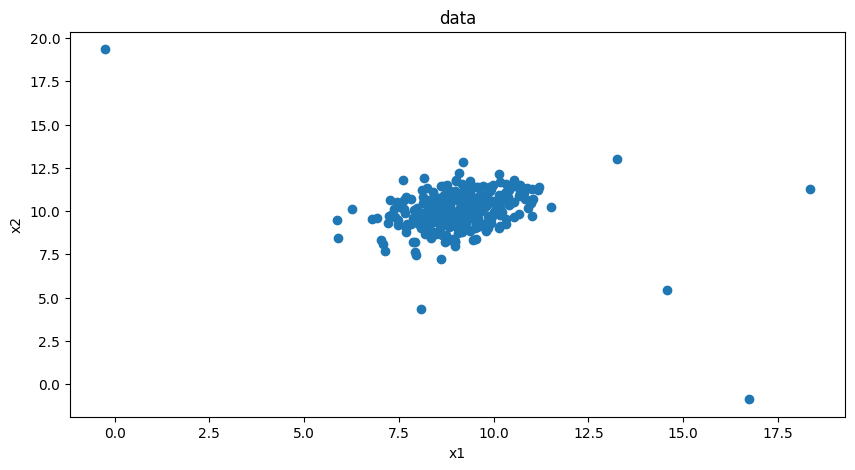

In [5]:
#visualize the data
from matplotlib import pyplot as plt
fig1 = plt.figure(figsize=(10,5))
plt.scatter(data.loc[:,'x1'],data.loc[:,'x2'])
plt.title('data')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [6]:
#define x1 and x2
x1 = data.loc[:,'x1']
x2 = data.loc[:,'x2']

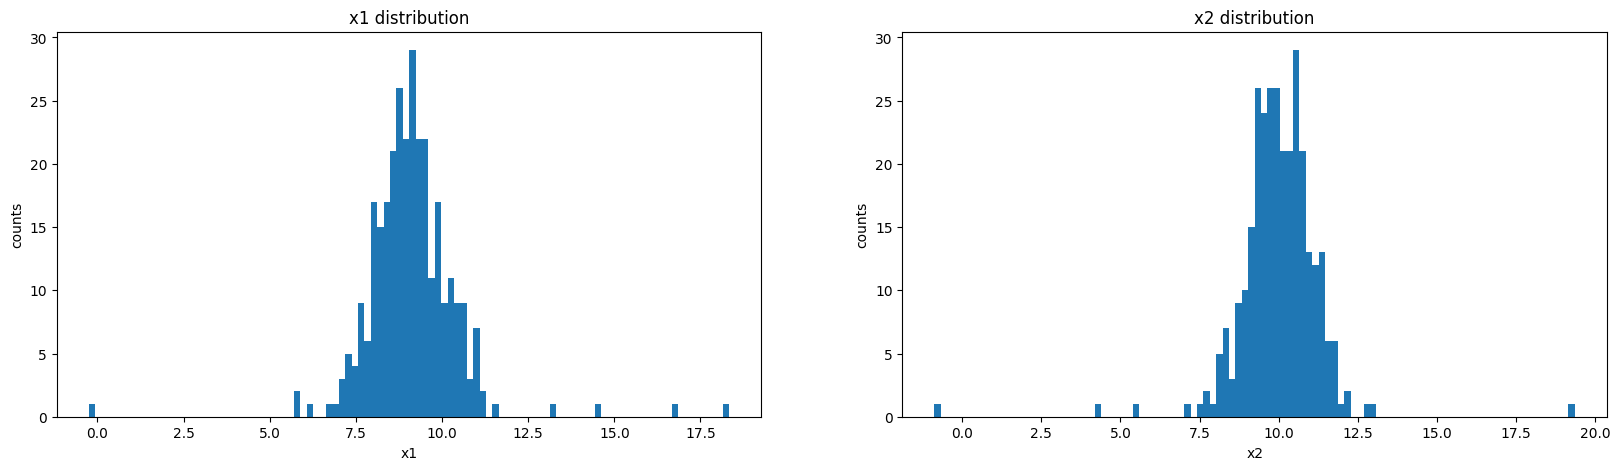

In [51]:
fig2 = plt.figure(figsize=(20,5))
plt.subplot(121)
plt.hist(x1,bins=100)
plt.title('x1 distribution')
plt.xlabel('x1')
plt.ylabel('counts')

plt.subplot(122)
plt.hist(x2,bins=100)
plt.title('x2 distribution')
plt.xlabel('x2')
plt.ylabel('counts')
plt.show()

In [20]:
#calculate the mean and sigma of x1 and x2
x1_mean = x1.mean()
x1_sigma = x1.std()
x2_mean = x2.mean()
x2_sigma = x2.std()
print(x1_mean,x1_sigma,x2_mean,x2_sigma)

9.112225783931596 1.3559573758220915 9.997710507954396 1.3097071175386399


In [27]:
#calculate the gaussian distribution p(x)
from scipy.stats import norm
x1_range = np.linspace(0,20,300) #創建0~20之間一共有300個點的數據
x1_normal = norm.pdf(x1_range,x1_mean,x1_sigma)
x2_range = np.linspace(0,20,300)
x2_normal = norm.pdf(x2_range,x2_mean,x2_sigma)
print(x1_normal)

[4.59439512e-11 6.39250512e-11 8.87272428e-11 1.22853079e-10
 1.69690787e-10 2.33815685e-10 3.21389865e-10 4.40690686e-10
 6.02807607e-10 8.22558389e-10 1.11969027e-09 1.52045032e-09
 2.05963243e-09 2.78323813e-09 3.75192518e-09 5.04546423e-09
 6.76848160e-09 9.05783765e-09 1.20920788e-08 1.61035107e-08
 2.13935729e-08 2.83523613e-08 3.74833421e-08 4.94345445e-08
 6.50378126e-08 8.53580478e-08 1.11754798e-07 1.45959055e-07
 1.90168713e-07 2.47166865e-07 3.20467940e-07 4.14497664e-07
 5.34813972e-07 6.88377332e-07 8.83880464e-07 1.13214921e-06
 1.44662831e-06 1.84396812e-06 2.34473095e-06 2.97423845e-06
 3.76358483e-06 4.75084425e-06 5.98250452e-06 7.51516355e-06
 9.41752964e-06 1.17727715e-05 1.46812688e-05 1.82638203e-05
 2.26653703e-05 2.80593218e-05 3.46525087e-05 4.26909039e-05
 5.24661477e-05 6.43229811e-05 7.86676738e-05 9.59775394e-05
 1.16811627e-04 1.41822682e-04 1.71770457e-04 2.07536462e-04
 2.50140207e-04 3.00757010e-04 3.60737401e-04 4.31628133e-04
 5.15194803e-04 6.134460

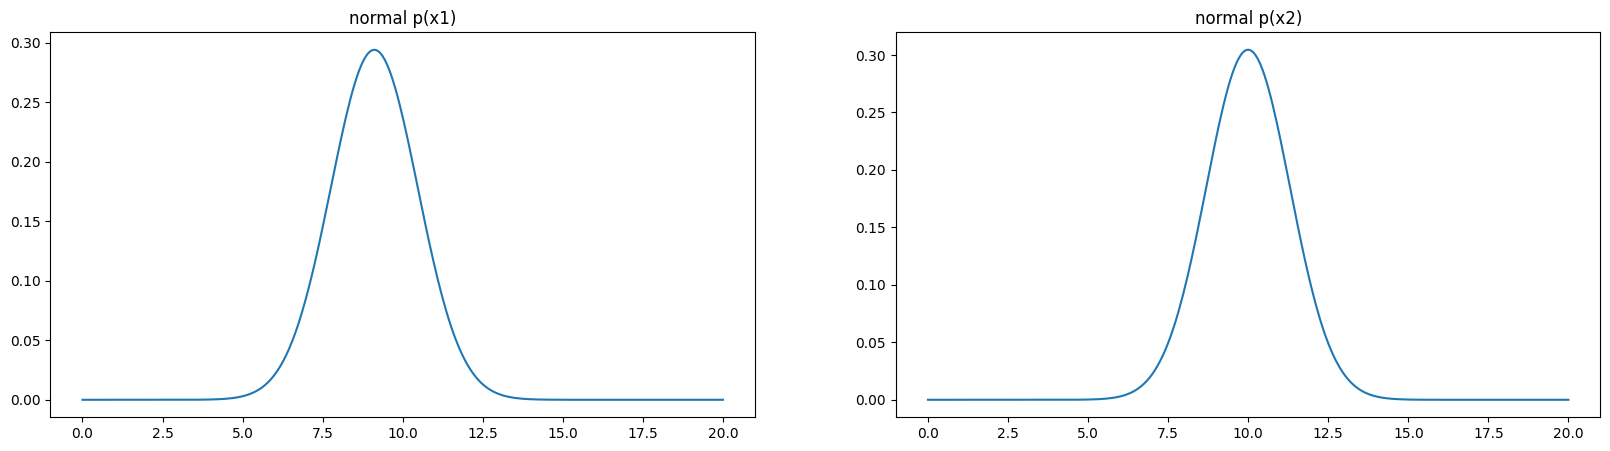

In [28]:
#visualize the p(x)
fig2 = plt.figure(figsize=(20,5))
plt.subplot(121)
plt.plot(x1_range,x1_normal)
plt.title('normal p(x1)')

plt.subplot(122)
plt.plot(x2_range,x2_normal)
plt.title('normal p(x2)')
plt.show()

In [32]:
#establish the model and predict
from sklearn.covariance import EllipticEnvelope
ad_model = EllipticEnvelope()
ad_model.fit(data)

EllipticEnvelope()

In [33]:
#make prediction
y_predict = ad_model.predict(data)
print(pd.value_counts(y_predict))

 1    276
-1     31
dtype: int64


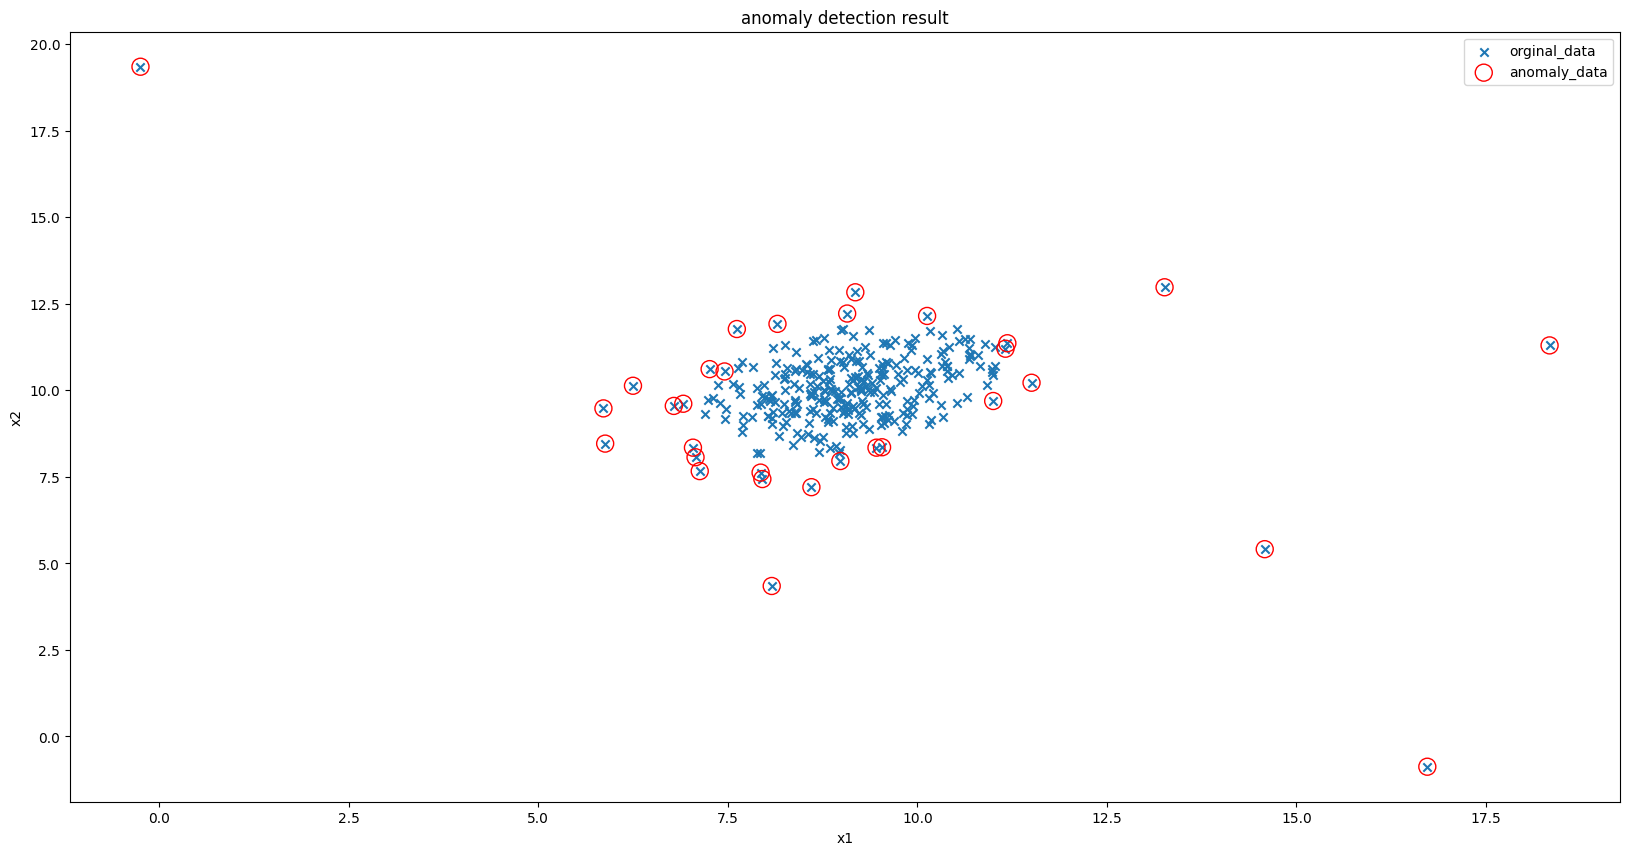

In [45]:
#visualize the result
fig4 = plt.figure(figsize=(20,10))
orginal_data=plt.scatter(data.loc[:,'x1'],data.loc[:,'x2'],marker='x') #marker 修改標記樣子
anomaly_data=plt.scatter(data.loc[:,'x1'][y_predict==-1],data.loc[:,'x2'][y_predict==-1]
            ,marker='o',facecolor='none',edgecolors='red',s=150) #facecolor填充色，edgecolors顔色，s尺寸

plt.title('anomaly detection result')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend((orginal_data,anomaly_data),('orginal_data','anomaly_data'))
plt.show()

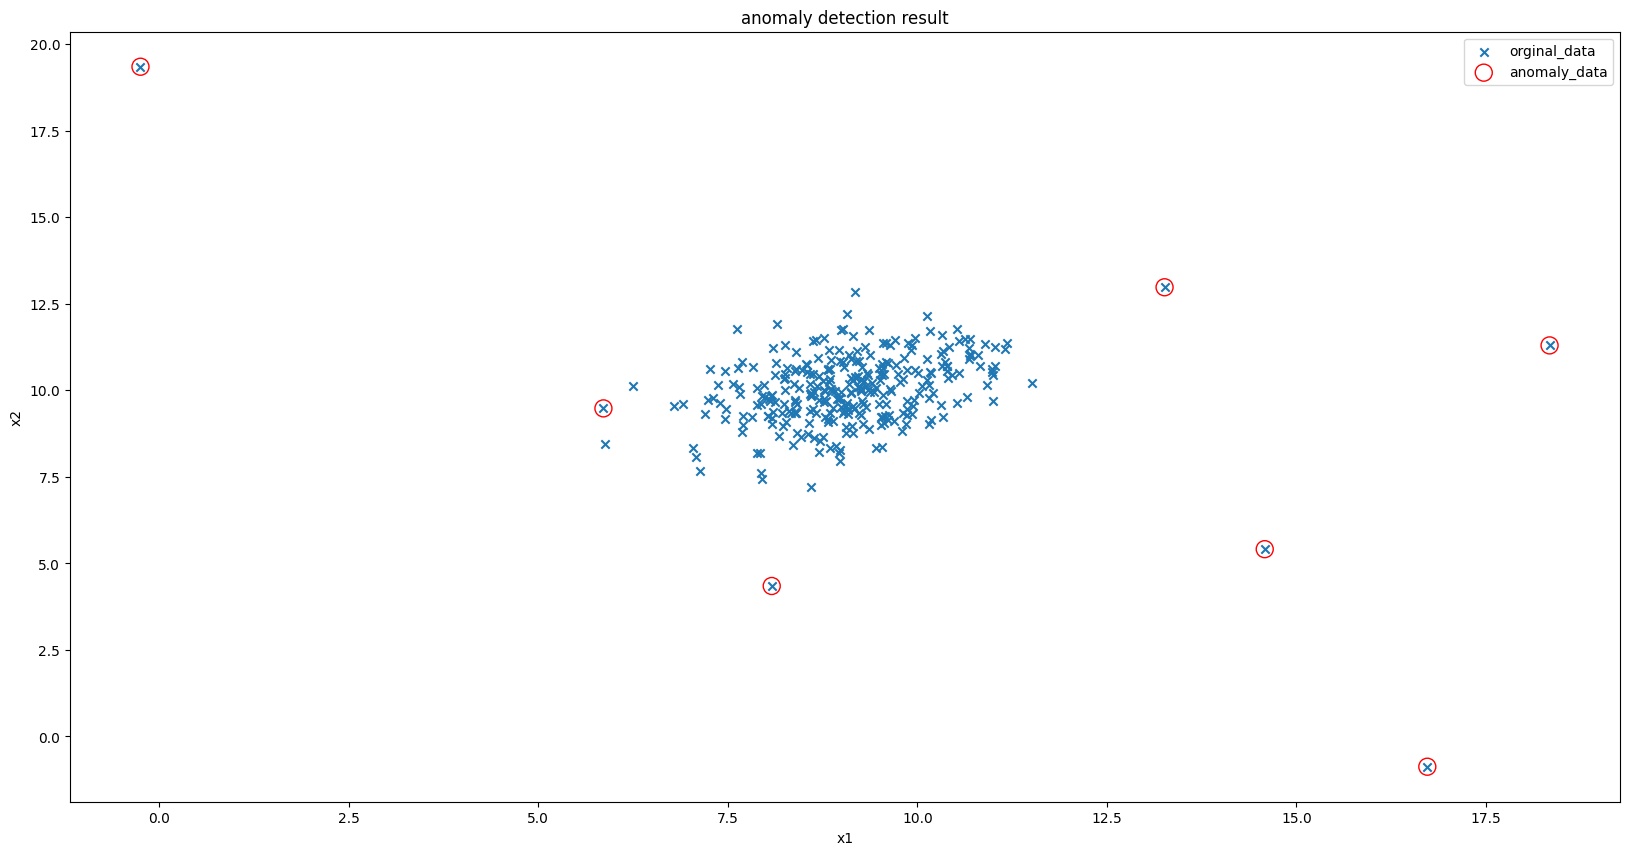

In [49]:
ad_model = EllipticEnvelope(contamination=0.02)
ad_model.fit(data)
y_predict = ad_model.predict(data)
fig5 = plt.figure(figsize=(20,10))
orginal_data=plt.scatter(data.loc[:,'x1'],data.loc[:,'x2'],marker='x') #marker 修改標記樣子
anomaly_data=plt.scatter(data.loc[:,'x1'][y_predict==-1],data.loc[:,'x2'][y_predict==-1]
            ,marker='o',facecolor='none',edgecolors='red',s=150) #facecolor填充色，edgecolors顔色，s尺寸

plt.title('anomaly detection result')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend((orginal_data,anomaly_data),('orginal_data','anomaly_data'))
plt.show()

**summary:**
- 通過計算數據各維度對應的搞事分佈概率密度函數，可用於尋找到數據中的異常點
- 通過修改概率密度閾值contamination，可調整異常點檢測的靈敏度